<a href="https://colab.research.google.com/github/brend-bird/20250306_listings_ath-quarto-main-sinGit/blob/main/Brenda_tree_heatlh_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [438]:
#Importing Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.metrics import confusion_matrix, matthews_corrcoef
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
import datetime
from sklearn.feature_selection import chi2
from scipy.stats import chi2_contingency

In [439]:
ls

Metric_plot_all_models.png  roc_curve_val.png
roc_curve_train.png         sample_data/


In [440]:
#Loading Data:
data = pd.read_csv("/content/sample_data/PRUEBA MODELADO_24_05 (2).csv", sep=';')
data

,f(vij)class,f(vij)class.1,DD1(s2),DD2(s2),DD3(s2),DV1(s2),DV2(s2),DV3(s2),DV4(s2),DV5(s2),DV6(s2),DD1(s3),DD2(s3),DD3(s3),DV1(s3),DV2(s3),DV3(s3),DV4(s3),DV5(s3),DV6(s3)
0,0,0.333333,-0.522222,-13.777778,-6.008084,0.164695,-0.156926,-0.007768,0.052922,-0.000653,-6.687222,-0.208511,-4.042553,-4.209042,0.051592,-0.598721,0.547129,0.223624,0.041076,2.062979
1,0,0.333333,-0.522222,-17.777778,-4.916389,-0.723537,0.013363,0.710175,0.022200,-0.059107,-12.987222,-0.208511,-8.042553,-3.117348,-0.836640,-0.428433,1.265072,0.192901,-0.017378,-4.237021
2,0,0.333333,-0.522222,-12.777778,-4.186549,-0.985434,0.022470,0.962964,0.028626,-0.013043,-4.967222,-0.208511,-3.042553,-2.387508,-1.098536,-0.419325,1.517861,0.199328,0.028686,3.782979
3,0,0.333333,-0.522222,-10.777778,-5.269133,-0.698610,0.234161,0.464450,-0.061923,-0.025419,-2.577222,-0.208511,-1.042553,-3.470091,-0.811713,-0.207634,1.019347,0.108778,0.016311,6.172979
4,0,0.333333,-0.522222,-9.777778,-3.073074,-1.065304,-0.258744,1.324049,0.137579,0.023461,-1.757222,-0.208511,-0.042553,-1.274033,-1.178407,-0.700539,1.878946,0.308280,0.065191,6.992979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0,0.333333,-0.522222,-12.555556,-7.100049,0.539337,0.753685,-1.293022,-0.304248,-0.074722,-2.721667,-0.008511,-0.042553,-0.873467,1.029872,0.749739,-1.779611,-0.321225,-0.082703,-4.837021
191,0,0.333333,-0.722222,-15.555556,-8.929475,0.726417,0.928068,-1.654485,-0.376988,-0.071852,-0.111667,-0.208511,-3.042553,-2.702893,1.216952,0.924121,-2.141074,-0.393965,-0.079833,-2.227021
192,0,0.333333,-0.122222,0.444444,1.367948,0.753016,-0.067898,-0.685118,-0.002763,0.027225,-2.111667,-0.240964,-2.487952,0.006154,1.127768,0.250668,-1.378437,-0.136887,-0.010813,-12.222892
193,0,0.333333,0.077778,8.444444,-0.867183,0.937530,-0.179487,-0.758043,0.032332,0.056226,-6.851667,-0.040964,5.512048,-2.228977,1.312283,0.139079,-1.451362,-0.101792,0.018187,-16.962892


Brenda: Ver el analisis de los datos para ver si hay nulos

In [441]:
#Model_LDA

In [442]:
Y_LDA= data.iloc[:,0]
X1= data.iloc[:,1]
X2= data.iloc[:,19]
X3= data.iloc[:,10]
X4= data.iloc[:,13]
X_LDA = pd.concat([X1,X2, X3, X4], axis=1)
X_LDA

,f(vij)class.1,DV6(s3),DV6(s2),DD3(s3)
0,0.333333,2.062979,-6.687222,-4.209042
1,0.333333,-4.237021,-12.987222,-3.117348
2,0.333333,3.782979,-4.967222,-2.387508
3,0.333333,6.172979,-2.577222,-3.470091
4,0.333333,6.992979,-1.757222,-1.274033
...,...,...,...,...
190,0.333333,-4.837021,-2.721667,-0.873467
191,0.333333,-2.227021,-0.111667,-2.702893
192,0.333333,-12.222892,-2.111667,0.006154
193,0.333333,-16.962892,-6.851667,-2.228977


In [443]:
# prompt: QUIERO CONTAR LOS VALORES DE LA COLUMNA y_LDA

Y_LDA.value_counts()


,count
f(vij)class,
0,132
1,63


In [444]:
#esto se usa para dividir los datos, el 33% de los datos se usarán para hacer un test, mientras que el 67% se usará para entrenar
X_train_LDA, X_test_LDA, y_train_LDA, y_test_LDA = train_test_split(X_LDA, Y_LDA, test_size=0.33, random_state=42)

In [445]:
# Definir las probabilidades a priori de clasificación
priors =  [0.5, 0.5]

In [446]:
# Inicializar el modelo LDA con las probabilidades a priori
LDA = LinearDiscriminantAnalysis(priors=priors)

In [447]:
LDA.fit(X_train_LDA, y_train_LDA)

LinearDiscriminantAnalysis(priors=[0.5, 0.5])

In [448]:
y_pred_train_LDA = LDA.predict(X_train_LDA)
y_pred_test_LDA = LDA.predict(X_test_LDA)

In [449]:
# Realizar validación cruzada con LinearDiscriminantAnalysis
cv_scores = cross_val_score(LDA, X_train_LDA, y_train_LDA, cv=5)  # 5-fold cross-validation
print("Cross-validation Scores:", cv_scores)

Cross-validation Scores: [0.84615385 0.92307692 0.76923077 0.92307692 0.80769231]


In [450]:
# Obtener nombres de las variables
nombres_variables = X_LDA.columns

In [451]:
# Coeficientes de la función discriminante lineal
coefficients = LDA.coef_[0]
intercept = LDA.intercept_[0]

In [452]:
# Imprimir la ecuación de la recta con nombres de variables
print("Ecuación de la recta:")
print("y = ", end="")
for i, coeficiente in enumerate(coefficients):
    nombre_variable = nombres_variables[i]
    print(f"({coeficiente:.2f} * {nombre_variable}) + ", end="")
print(f"{intercept:.2f}")

Ecuación de la recta:
y = (8.74 * f(vij)class.1) + (-0.03 * DV6(s3)) + (0.30 * DV6(s2)) + (0.14 * DD3(s3)) + -3.30


In [453]:
confusion_matrix(y_train_LDA,y_pred_train_LDA)
tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()

sn =((tp)/(tp+fn))*100
sp = ((tn)/(tn+fp))*100
print("Training Set")
print("Sensitivity:", sn)
print("Specificity:", sp)


confusion_matrix(y_test_LDA,y_pred_test_LDA)
tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()

sn =((tp)/(tp+fn))*100
sp = ((tn)/(tn+fp))*100
print("Testing Set")
print("Sensitivity:", sn)
print("Specificity:", sp)

Training Set
Sensitivity: 50.0
Specificity: 0.0
Testing Set
Sensitivity: 50.0
Specificity: 0.0


In [454]:
#Decision tree_Model

In [455]:
Y_tree = data.iloc[:, 0]
X1 = data.iloc[:, 1]
X2 = data.iloc[:, 19]
X3 = data.iloc[:, 10]
X4 = data.iloc[:, 13]
X_tree = pd.concat([X1,X2, X3, X4], axis=1)
X_tree

,f(vij)class.1,DV6(s3),DV6(s2),DD3(s3)
0,0.333333,2.062979,-6.687222,-4.209042
1,0.333333,-4.237021,-12.987222,-3.117348
2,0.333333,3.782979,-4.967222,-2.387508
3,0.333333,6.172979,-2.577222,-3.470091
4,0.333333,6.992979,-1.757222,-1.274033
...,...,...,...,...
190,0.333333,-4.837021,-2.721667,-0.873467
191,0.333333,-2.227021,-0.111667,-2.702893
192,0.333333,-12.222892,-2.111667,0.006154
193,0.333333,-16.962892,-6.851667,-2.228977


In [456]:
#El conjunto de entrenamiento se utiliza para ajustar el modelo, mientras que el conjunto de prueba se utiliza para evaluar su rendimiento en datos nunca antes vistos.
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(X_tree, Y_tree, test_size=0.33, random_state=42)

In [457]:
# Y luego:
class_weights= {0: 0.5, 1: 0.5}
seed = 40
# Define the decision tree model y aplica los pesos de class weights definidos anteriormente
tree_model = DecisionTreeClassifier(random_state=seed,class_weight='balanced') # Corrected: use class_weight_dict

In [458]:
# Define the hyperparameter search space
param_grid = {
    'criterion': ['gini', 'entropy'],
     'max_depth': [20],
     'min_samples_split': [3],
    'min_samples_leaf': [2]
}

In [459]:
# Perform hyperparameter search by cross-validation
grid_search_tree = GridSearchCV(tree_model, param_grid, cv=5, scoring='accuracy')
grid_search_tree.fit(X_train_tree, y_train_tree)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=40),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [20],
                         'min_samples_leaf': [2], 'min_samples_split': [3]},
             scoring='accuracy')

In [460]:
# Print the best hyperparameters
best_params = grid_search_tree.best_params_
print("better hyperparameters :", best_params)

better hyperparameters : {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 3}


In [461]:
 # Print all hyperparameters, including internal hyperparameters
all_params = grid_search_tree.best_estimator_.get_params()
print("\nAll hyperparameters:")
for param_name in sorted(all_params.keys()):
    print(f"{param_name}: {all_params[param_name]}")


All hyperparameters:
ccp_alpha: 0.0
class_weight: balanced
criterion: gini
max_depth: 20
max_features: None
max_leaf_nodes: None
min_impurity_decrease: 0.0
min_samples_leaf: 2
min_samples_split: 3
min_weight_fraction_leaf: 0.0
monotonic_cst: None
random_state: 40
splitter: best


In [462]:
# Ramdom forest_Model

In [463]:
Y_rf= data.iloc[:,0]
X1= data.iloc[:,1]
X2= data.iloc[:,19]
X3= data.iloc[:,10]
X4 = data.iloc[:, 13]
X_rf= pd.concat([X1,X2, X3,X4], axis=1)
X_rf

,f(vij)class.1,DV6(s3),DV6(s2),DD3(s3)
0,0.333333,2.062979,-6.687222,-4.209042
1,0.333333,-4.237021,-12.987222,-3.117348
2,0.333333,3.782979,-4.967222,-2.387508
3,0.333333,6.172979,-2.577222,-3.470091
4,0.333333,6.992979,-1.757222,-1.274033
...,...,...,...,...
190,0.333333,-4.837021,-2.721667,-0.873467
191,0.333333,-2.227021,-0.111667,-2.702893
192,0.333333,-12.222892,-2.111667,0.006154
193,0.333333,-16.962892,-6.851667,-2.228977


In [464]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, Y_rf, test_size=0.33, random_state=42)

In [465]:
class_weights = {0: 0.5, 1: 0.5}
seed = 44

In [466]:
# Define the random forest model
rf_model = RandomForestClassifier(random_state=seed,class_weight='balanced')

In [467]:
# Definir el rango de hiperparámetros a explorar
param_grid = {
    'n_estimators': [10],
    'max_depth': [200],
    'min_samples_split': [10],
    'min_samples_leaf': [3]
}

In [468]:
# Perform hyperparameter search by cross-validation
grid_search_rf = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train_rf, y_train_rf)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=44),
             param_grid={'max_depth': [200], 'min_samples_leaf': [3],
                         'min_samples_split': [10], 'n_estimators': [10]},
             scoring='accuracy')

In [469]:
# best hyperparameters
best_params = grid_search_rf.best_params_
print("Mejores hiperparámetros:", best_params)

Mejores hiperparámetros: {'max_depth': 200, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 10}


In [470]:
# Print all hyperparameters, including internal hyperparameters
all_params = grid_search_rf.best_estimator_.get_params()
print("\nTodos los hiperparámetros:")
for param_name in sorted(all_params.keys()):
    print(f"{param_name}: {all_params[param_name]}")


Todos los hiperparámetros:
bootstrap: True
ccp_alpha: 0.0
class_weight: balanced
criterion: gini
max_depth: 200
max_features: sqrt
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 3
min_samples_split: 10
min_weight_fraction_leaf: 0.0
monotonic_cst: None
n_estimators: 10
n_jobs: None
oob_score: False
random_state: 44
verbose: 0
warm_start: False


In [471]:
# GB_Model

In [472]:
Y_gb= data.iloc[:,0]
X1= data.iloc[:,1]
X2= data.iloc[:,19]
X3= data.iloc[:,10]
X4 = data.iloc[:, 13]
X_gb = pd.concat([X1,X2, X3,X4], axis=1)
X_gb

,f(vij)class.1,DV6(s3),DV6(s2),DD3(s3)
0,0.333333,2.062979,-6.687222,-4.209042
1,0.333333,-4.237021,-12.987222,-3.117348
2,0.333333,3.782979,-4.967222,-2.387508
3,0.333333,6.172979,-2.577222,-3.470091
4,0.333333,6.992979,-1.757222,-1.274033
...,...,...,...,...
190,0.333333,-4.837021,-2.721667,-0.873467
191,0.333333,-2.227021,-0.111667,-2.702893
192,0.333333,-12.222892,-2.111667,0.006154
193,0.333333,-16.962892,-6.851667,-2.228977


In [473]:
X_train_gb, X_test_gb, y_train_gb, y_test_gb = train_test_split(X_gb, Y_gb, test_size=0.33, random_state=42)

In [474]:
seed = 42
# Define the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=seed)

In [475]:
# Define the range of hyperparameters to scan
param_grid = {
    'n_estimators': [3],
    'learning_rate': [0.9],
    'max_depth': [80],
    'min_samples_split': [7],
    'min_samples_leaf': [6]
}

In [476]:
# Create the GridSearchCV object
grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
# Entrenar el modelo
grid_search_gb.fit(X_train_gb, y_train_gb)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.9], 'max_depth': [80],
                         'min_samples_leaf': [6], 'min_samples_split': [7],
                         'n_estimators': [3]},
             scoring='accuracy')

In [477]:
# Get the best hyperparameters
best_params_gb = grid_search_gb.best_params_
print("Mejores hiperparámetros para Gradient Boosting:", best_params_gb)

Mejores hiperparámetros para Gradient Boosting: {'learning_rate': 0.9, 'max_depth': 80, 'min_samples_leaf': 6, 'min_samples_split': 7, 'n_estimators': 3}


In [478]:
# Print all internal hyperparameters
internal_params = grid_search_gb.best_estimator_.get_params()
print("\nTodos los hiperparámetros internos:")
for param_name, param_value in internal_params.items():
    print(f"{param_name}: {param_value}")


Todos los hiperparámetros internos:
ccp_alpha: 0.0
criterion: friedman_mse
init: None
learning_rate: 0.9
loss: log_loss
max_depth: 80
max_features: None
max_leaf_nodes: None
min_impurity_decrease: 0.0
min_samples_leaf: 6
min_samples_split: 7
min_weight_fraction_leaf: 0.0
n_estimators: 3
n_iter_no_change: None
random_state: 42
subsample: 1.0
tol: 0.0001
validation_fraction: 0.1
verbose: 0
warm_start: False


In [479]:
# KNN models

El modelo KNN evalua los vecinos más cercanos, para ello separamos los valores X y Y. Las variables X son las variables explicativas, mientras que las variables Y, es la variable objetivo. Separamos en train y test. Las variables deben ser numéricas para poder ver la distacia entre el train y el test, por ello se usan todas las variables numéricas.

In [480]:
Y_knn= data.iloc[:,0]
X1= data.iloc[:,1]
X2= data.iloc[:,19]
X3= data.iloc[:,10]
X4 = data.iloc[:, 13]
X_knn = pd.concat([X1,X2, X3,X4], axis=1)
X_knn

,f(vij)class.1,DV6(s3),DV6(s2),DD3(s3)
0,0.333333,2.062979,-6.687222,-4.209042
1,0.333333,-4.237021,-12.987222,-3.117348
2,0.333333,3.782979,-4.967222,-2.387508
3,0.333333,6.172979,-2.577222,-3.470091
4,0.333333,6.992979,-1.757222,-1.274033
...,...,...,...,...
190,0.333333,-4.837021,-2.721667,-0.873467
191,0.333333,-2.227021,-0.111667,-2.702893
192,0.333333,-12.222892,-2.111667,0.006154
193,0.333333,-16.962892,-6.851667,-2.228977


In [481]:
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, Y_knn, test_size=0.33, random_state=42)

In [482]:
knn_model = KNeighborsClassifier(weights='distance', n_neighbors=5)

In [483]:
# Define the hyperparameter search space
param_grid = {
   'n_neighbors': [20],  # Range of values for n_neighbors
    'p': [7]  # Range of values for the power parameter
}

In [484]:
# Perform hyperparameter search by cross-validation
grid_search_knn = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train_knn, y_train_knn)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(weights='distance'),
             param_grid={'n_neighbors': [20], 'p': [7]}, scoring='accuracy')

GridSearchCV es una herramienta en scikit-learn que nos ayuda a encontrar automáticamente la mejor combinación de estos hiperparámetros, para obtener el mejor rendimiento del modelo


In [485]:
# Get the best hyperparameters
best_params_knn = grid_search_knn.best_params_
print("Best hyperparameters for KNeighborsClassifier:", best_params_knn)

Best hyperparameters for KNeighborsClassifier: {'n_neighbors': 20, 'p': 7}


In [486]:
# Print all hyperparameters, including internal hyperparameters
all_params_knn = grid_search_knn.best_estimator_.get_params()
print("\nAll hyperparameters for KNeighborsClassifier:")
for param_name, param_value in all_params_knn.items():
    print(f"{param_name}: {param_value}")


All hyperparameters for KNeighborsClassifier:
algorithm: auto
leaf_size: 30
metric: minkowski
metric_params: None
n_jobs: None
n_neighbors: 20
p: 7
weights: distance


In [487]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',metric_params=None, n_jobs=1, n_neighbors=20, p=7, weights=None)


In [488]:
knn.fit(X_train_knn, y_train_knn)

KNeighborsClassifier(n_jobs=1, n_neighbors=20, p=7, weights=None)

In [489]:
prediccion = knn.predict(X_train_knn)

In [490]:
# make predictions on the train set
y_pred_train_LDA = LDA.predict(X_train_LDA)
y_pred_train_tree = grid_search_tree.predict(X_train_tree)
y_pred_train_rf = grid_search_rf.predict(X_train_rf)
y_pred_train_gb = grid_search_gb.predict(X_train_gb)
y_pred_train_knn = grid_search_knn.predict(X_train_knn)

# MATRICES DE CONFUSION

In [491]:
# calculate confusion matrices
cm_train_LDA = confusion_matrix(y_train_LDA, y_pred_train_LDA)
cm_train_tree = confusion_matrix(y_train_tree, y_pred_train_tree)
cm_train_rf = confusion_matrix(y_train_rf, y_pred_train_rf)
cm_train_gb = confusion_matrix(y_train_gb, y_pred_train_gb)
cm_train_knn = confusion_matrix(y_train_knn, y_pred_train_knn)

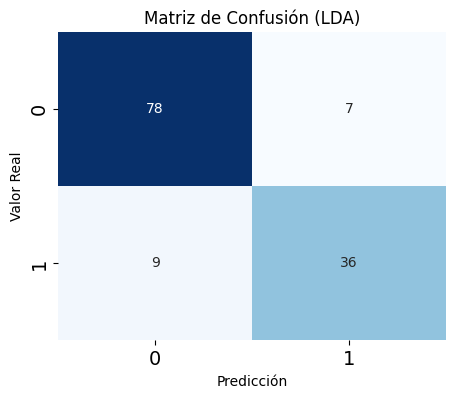

In [492]:
# prompt: Hacer un plot de la matriz de confusion cm_train_LDA

import matplotlib.pyplot as plt
plt.figure(figsize=(5, 4))
sns.heatmap(cm_train_LDA, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Matriz de Confusión (LDA)")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.show()


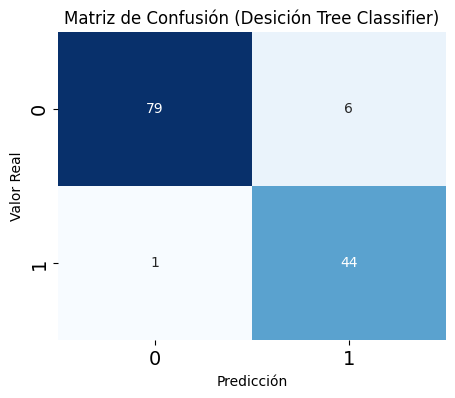

In [493]:
# prompt: Hacer un plot de la matriz de confusion cm_train_

import matplotlib.pyplot as plt
plt.figure(figsize=(5, 4))
sns.heatmap(cm_train_tree, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Matriz de Confusión (Desición Tree Classifier)")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.show()

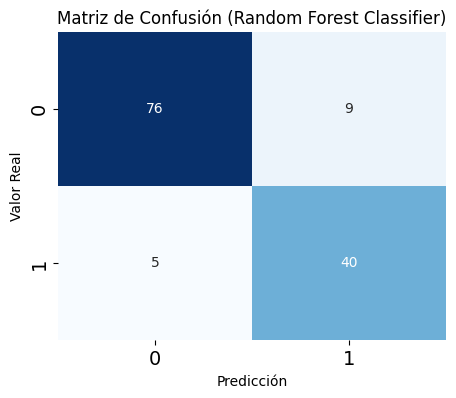

In [494]:
# prompt: Hacer un plot de la matriz de confusion cm_train_

import matplotlib.pyplot as plt
plt.figure(figsize=(5, 4))
sns.heatmap(cm_train_rf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Matriz de Confusión (Random Forest Classifier)")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.show()

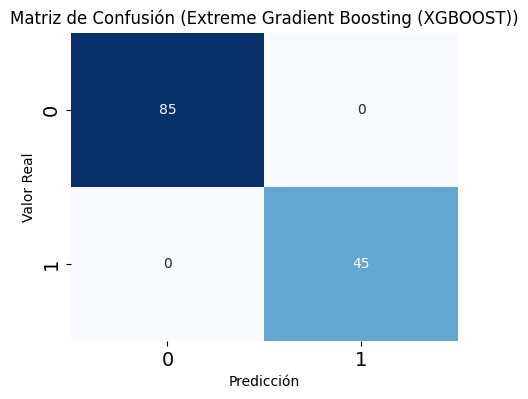

In [495]:
# prompt: Hacer un plot de la matriz de confusion cm_train_

import matplotlib.pyplot as plt
plt.figure(figsize=(5, 4))
sns.heatmap(cm_train_gb, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Matriz de Confusión (Extreme Gradient Boosting (XGBOOST))")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.show()

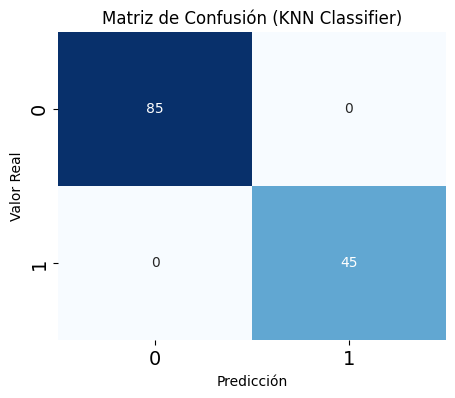

In [496]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 4))
sns.heatmap(cm_train_knn, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Matriz de Confusión (KNN Classifier)")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.show()

In [497]:
cm_train_LDA

array([[78,  7],
       [ 9, 36]])

El modelo Desicion tree, en el que tiene solo 4 falsos negativos,

In [498]:
cm_train_tree

array([[79,  6],
       [ 1, 44]])

In [499]:
cm_train_rf

array([[76,  9],
       [ 5, 40]])

El modelo KNN, te da una matrix de confusion perfecta, ya que tiene 0 falsos negativos y falsos positivos.

In [500]:
cm_train_knn

array([[85,  0],
       [ 0, 45]])

test matrices

# Métricas principales: Las siguientes métricas se utilizan comúnmente para evaluar el rendimiento de los modelos de clasificación:



# Nueva sección

In [501]:
# calculate performance metrics
tn_train_LDA, fp_train_LDA, fn_train_LDA, tp_train_LDA = cm_train_LDA.ravel()
tn_train_tree, fp_train_tree, fn_train_tree, tp_train_tree = cm_train_tree.ravel()
tn_train_rf, fp_train_rf, fn_train_rf, tp_train_rf = cm_train_rf.ravel()
tn_train_gb, fp_train_gb, fn_train_gb, tp_train_gb = cm_train_gb.ravel()
tn_train_knn, fp_train_knn, fn_train_knn, tp_train_knn = cm_train_knn.ravel()

MODELO LDA

In [502]:
specificity_train_LDA = tn_train_LDA / (tn_train_LDA + fp_train_LDA)
sensitivity_train_LDA = tp_train_LDA / (tp_train_LDA + fn_train_LDA)
accuracy_train_LDA = (tp_train_LDA + tn_train_LDA) / (tp_train_LDA + tn_train_LDA + fp_train_LDA + fn_train_LDA)
false_positive_train_LDA = fp_train_LDA / (fp_train_LDA + tn_train_LDA)

MODELO Arbol de desición

In [503]:
specificity_train_tree = tn_train_tree / (tn_train_tree + fp_train_tree)
sensitivity_train_tree = tp_train_tree / (tp_train_tree + fn_train_tree)
accuracy_train_tree = (tp_train_tree + tn_train_tree) / (tp_train_tree + tn_train_tree + fp_train_tree + fn_train_tree)
false_positive_train_tree = fp_train_tree / (fp_train_tree + tn_train_tree)

Modelo random forest

In [504]:
specificity_train_rf = tn_train_rf / (tn_train_rf + fp_train_rf)
sensitivity_train_rf = tp_train_rf / (tp_train_rf + fn_train_rf)
accuracy_train_rf = (tp_train_rf + tn_train_rf) / (tp_train_rf + tn_train_rf + fp_train_rf + fn_train_rf)
false_positive_train_rf = fp_train_rf / (fp_train_rf + tn_train_rf)

Modelo Gausiano

In [505]:
specificity_train_gb = tn_train_gb / (tn_train_gb + fp_train_gb)
sensitivity_train_gb = tp_train_gb / (tp_train_gb + fn_train_gb)
accuracy_train_gb = (tp_train_gb + tn_train_gb) / (tp_train_gb + tn_train_gb + fp_train_gb + fn_train_gb)
false_positive_train_gb = fp_train_gb / (fp_train_gb + tn_train_gb)

MODELO KNN

In [506]:
specificity_train_knn = tn_train_knn / (tn_train_knn + fp_train_knn)
sensitivity_train_knn = tp_train_knn / (tp_train_knn + fn_train_knn)
accuracy_train_knn = (tp_train_knn + tn_train_knn) / (tp_train_knn + tn_train_knn + fp_train_knn + fn_train_knn)
false_positive_train_knn = fp_train_knn / (fp_train_knn + tn_train_knn)

In [507]:
# mcc_train_LDA = matthews_corrcoef(y_train_LDA, y_pred_train_LDA)
# mcc_train_tree = matthews_corrcoef(y_train_tree, y_pred_train_tree)
# mcc_train_rf = matthews_corrcoef(y_train_rf, y_pred_train_rf)
# mcc_train_gb = matthews_corrcoef(y_train_gb, y_pred_train_gb)
# mcc_train_knn = matthews_corrcoef(y_train_knn, y_pred_train_knn)

In [508]:
# make predictions on the test set
y_pred_test_LDA = LDA.predict(X_test_LDA)
y_pred_test_tree = grid_search_tree.predict(X_test_tree)
y_pred_test_rf = grid_search_rf.predict(X_test_rf)
y_pred_test_gb = grid_search_gb.predict(X_test_gb)
y_pred_test_knn = grid_search_knn.predict(X_test_knn)

In [509]:
cm_pred_test_LDA = confusion_matrix(y_test_LDA, y_pred_test_LDA)
cm_pred_test_tree = confusion_matrix(y_test_tree, y_pred_test_tree)
cm_pred_test_rf = confusion_matrix(y_test_rf, y_pred_test_rf)
cm_pred_test_gb = confusion_matrix(y_test_gb, y_pred_test_gb)
cm_pred_test_knn = confusion_matrix(y_test_knn, y_pred_test_knn)

In [510]:
# calculate performance metrics on test set
tn_test_LDA, fp_test_LDA, fn_test_LDA, tp_test_LDA = cm_pred_test_LDA.ravel()
tn_test_tree, fp_test_tree, fn_test_tree, tp_test_tree = cm_pred_test_tree.ravel()
tn_test_rf, fp_test_rf, fn_test_rf, tp_test_rf = cm_pred_test_rf.ravel()
tn_test_gb, fp_test_gb, fn_test_gb, tp_test_gb = cm_pred_test_gb.ravel()
tn_test_knn, fp_test_knn, fn_test_knn, tp_test_knn = cm_pred_test_knn.ravel()

In [511]:
specificity_test_LDA = tn_test_LDA / (tn_test_LDA + fp_test_LDA)
sensitivity_test_LDA = tp_test_LDA / (tp_test_LDA + fn_test_LDA)
accuracy_test_LDA = (tp_test_LDA + tn_test_LDA) / (tp_test_LDA + tn_test_LDA + fp_test_LDA + fn_test_LDA)
false_positive_test_LDA = fp_test_LDA / (fp_test_LDA + tn_test_LDA)

In [512]:
specificity_test_tree = tn_test_tree / (tn_test_tree + fp_test_tree)
sensitivity_test_tree = tp_test_tree / (tp_test_tree + fn_test_tree)
accuracy_test_tree = (tp_test_tree + tn_test_tree) / (tp_test_tree + tn_test_tree + fp_test_tree + fn_test_tree)
false_positive_test_tree = fp_test_tree / (fp_test_tree + tn_test_tree)

In [513]:
specificity_test_rf = tn_test_rf / (tn_test_rf + fp_test_rf)
sensitivity_test_rf = tp_test_rf / (tp_test_rf + fn_test_rf)
accuracy_test_rf = (tp_test_rf + tn_test_rf) / (tp_test_rf + tn_test_rf + fp_test_rf + fn_test_rf)
false_positive_test_rf = fp_test_rf / (fp_test_rf + tn_test_rf)

In [514]:
specificity_test_gb = tn_test_gb / (tn_test_gb + fp_test_gb)
sensitivity_test_gb = tp_test_gb / (tp_test_gb + fn_test_gb)
accuracy_test_gb = (tp_test_gb + tn_test_gb) / (tp_test_gb + tn_test_gb + fp_test_gb + fn_test_gb)
false_positive_test_gb = fp_test_gb / (fp_test_gb + tn_test_gb)

In [515]:
specificity_test_knn = tn_test_knn / (tn_test_knn + fp_test_knn)
sensitivity_test_knn = tp_test_knn / (tp_test_knn + fn_test_knn)
accuracy_test_knn = (tp_test_knn + tn_test_knn) / (tp_test_knn + tn_test_knn + fp_test_knn + fn_test_knn)
false_positive_test_knn = fp_test_knn / (fp_test_knn + tn_test_knn)

In [516]:
#mcc_test_LDA = matthews_corrcoef(y_test_LDA, y_pred_test_LDA)
#mcc_test_tree = matthews_corrcoef(y_test_tree, y_pred_test_tree)
#mcc_test_rf = matthews_corrcoef(y_test_rf, y_pred_test_rf)
#mcc_test_gb = matthews_corrcoef(y_test_gb, y_pred_test_gb)
#mcc_test_knn = matthews_corrcoef(y_test_knn, y_pred_test_knn)

In [517]:
# Valores para el conjunto de entrenamiento
LDA_train_values = [accuracy_train_LDA, specificity_train_LDA, sensitivity_train_LDA, 1 - false_positive_train_LDA] #mcc_train_LDA]
tree_train_values = [accuracy_train_tree, specificity_train_tree, sensitivity_train_tree, 1 - false_positive_train_tree] #mcc_train_tree]
rf_train_values = [accuracy_train_rf, specificity_train_rf, sensitivity_train_rf, 1 - false_positive_train_rf] #mcc_train_rf]
gb_train_values = [accuracy_train_gb, specificity_train_gb, sensitivity_train_gb, 1 - false_positive_train_gb] #mcc_train_gb]
knn_train_values = [accuracy_train_knn, specificity_train_knn, sensitivity_train_knn, 1 - false_positive_train_knn] #mcc_train_knn]

In [518]:
# Valores para el conjunto de prueba
LDA_test_values = [accuracy_test_LDA, specificity_test_LDA, sensitivity_test_LDA, 1 - false_positive_test_LDA] #mcc_test_LDA]
tree_test_values = [accuracy_test_tree, specificity_test_tree, sensitivity_test_tree, 1 - false_positive_test_tree] #mcc_test_tree]
rf_test_values = [accuracy_test_rf, specificity_test_rf, sensitivity_test_rf, 1 - false_positive_test_rf] #mcc_test_rf]
gb_test_values = [accuracy_test_gb, specificity_test_gb, sensitivity_test_gb, 1 - false_positive_test_gb] #mcc_test_gb]
knn_test_values = [accuracy_test_knn, specificity_test_knn, sensitivity_test_knn, 1 - false_positive_test_knn] #mcc_test_knn]

In [519]:
LDA_test_values

[np.float64(0.8307692307692308),
 np.float64(0.8297872340425532),
 np.float64(0.8333333333333334),
 np.float64(0.8297872340425532)]

In [520]:
tree_test_values

[np.float64(0.8),
 np.float64(0.7446808510638298),
 np.float64(0.9444444444444444),
 np.float64(0.7446808510638299)]

In [521]:
rf_test_values

[np.float64(0.7384615384615385),
 np.float64(0.7021276595744681),
 np.float64(0.8333333333333334),
 np.float64(0.7021276595744681)]

In [522]:
knn_test_values

[np.float64(0.9384615384615385),
 np.float64(0.9361702127659575),
 np.float64(0.9444444444444444),
 np.float64(0.9361702127659575)]

In [523]:
gb_test_values

[np.float64(0.9230769230769231),
 np.float64(0.9148936170212766),
 np.float64(0.9444444444444444),
 np.float64(0.9148936170212766)]

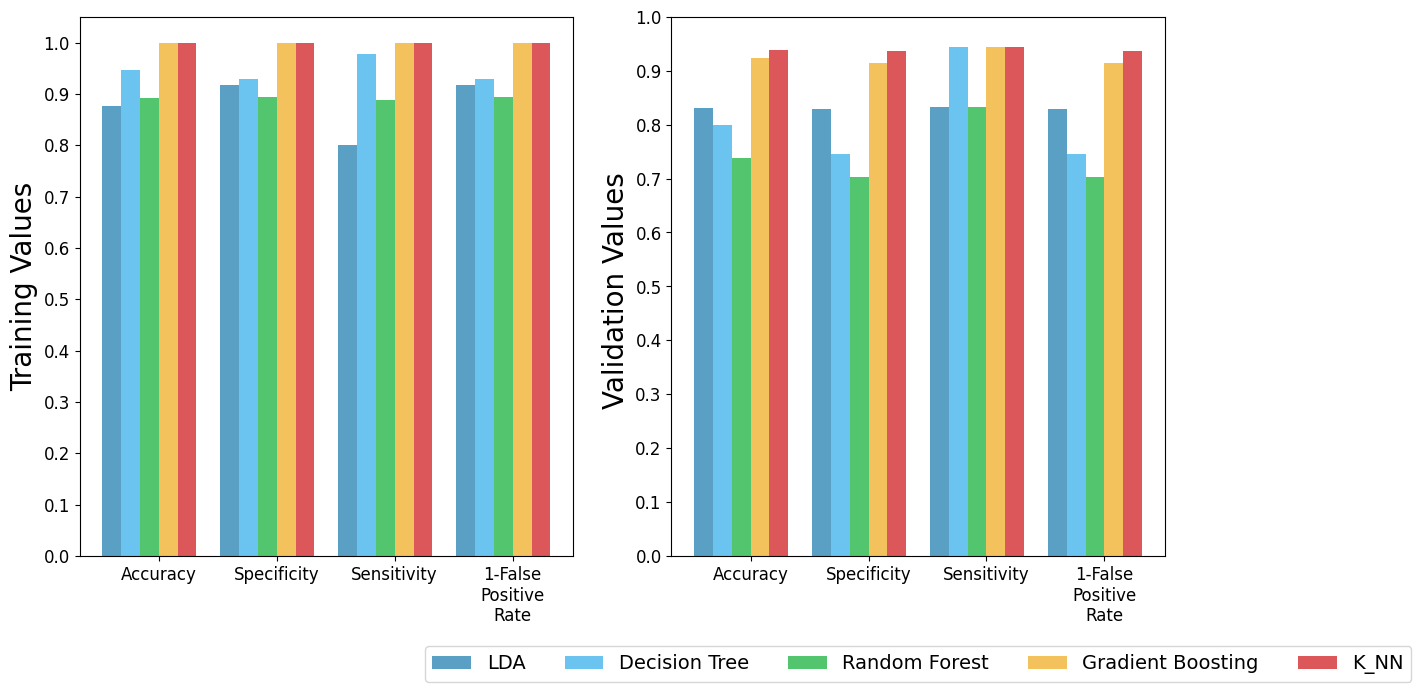

In [524]:
import numpy as np
import matplotlib.pyplot as plt

# Definir las etiquetas y los valores para cada métrica y modelo
labels = ['Accuracy', 'Specificity', 'Sensitivity', '1-False\nPositive\nRate']

# Valores para el conjunto de entrenamiento
LDA_train_values = [accuracy_train_LDA, specificity_train_LDA, sensitivity_train_LDA, 1-false_positive_train_LDA]
tree_train_values = [accuracy_train_tree, specificity_train_tree, sensitivity_train_tree, 1-false_positive_train_tree]
rf_train_values = [accuracy_train_rf, specificity_train_rf, sensitivity_train_rf, 1-false_positive_train_rf]
gb_train_values = [accuracy_train_gb, specificity_train_gb, sensitivity_train_gb, 1-false_positive_train_gb]
knn_train_values = [accuracy_train_knn, specificity_train_knn, sensitivity_train_knn, 1-false_positive_train_knn]

# Valores para el conjunto de prueba
LDA_test_values = [accuracy_test_LDA, specificity_test_LDA, sensitivity_test_LDA, 1-false_positive_test_LDA]
tree_test_values = [accuracy_test_tree, specificity_test_tree, sensitivity_test_tree, 1-false_positive_test_tree]
rf_test_values = [accuracy_test_rf, specificity_test_rf, sensitivity_test_rf, 1-false_positive_test_rf]
gb_test_values = [accuracy_test_gb, specificity_test_gb, sensitivity_test_gb, 1-false_positive_test_gb]
knn_test_values = [accuracy_test_knn, specificity_test_knn, sensitivity_test_knn, 1-false_positive_test_knn]

# Crear un arreglo con los índices para las etiquetas
x = np.arange(len(labels))
# Definir el ancho de las barras
width = 0.16

# Crear la figura y los ejes para los subgráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,7))

# Colores para los modelos
colors_train = ['#1476AB', '#2DACEB', '#0BAD32', '#F0A818', '#CC1013']
colors_test = ['#1476AB', '#2DACEB', '#0BAD32', '#F0A818', '#CC1013']

# Gráfico de barras para el conjunto de entrenamiento
rects1 = ax1.bar(x - 2*width, LDA_train_values, width, label='LDA', color=colors_train[0], alpha=0.7)
rects2 = ax1.bar(x - width, tree_train_values, width, label='Decision Tree', color=colors_train[1], alpha=0.7)
rects3 = ax1.bar(x, rf_train_values, width, label='Random Forest', color=colors_train[2], alpha=0.7)
rects4 = ax1.bar(x + width, gb_train_values, width, label='Gradient Boosting', color=colors_train[3], alpha=0.7)
rects5 = ax1.bar(x + 2*width, knn_train_values, width, label='KNeighbors', color=colors_train[4], alpha=0.7)

ax1.set_ylabel('Training Values', fontsize=20)
ax1.set_xticks(x + width / 2)
ax1.set_xticklabels(labels, fontsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax1.set_yticks(np.arange(0, max(max(LDA_train_values), max(tree_train_values), max(rf_train_values), max(gb_train_values), max(knn_train_values)) + 0.1, 0.1))

# Gráfico de barras para el conjunto de prueba
rects1 = ax2.bar(x - 2*width, LDA_test_values, width, label='LDA', color=colors_test[0], alpha=0.7)
rects2 = ax2.bar(x - width, tree_test_values, width, label='Decision Tree', color=colors_test[1], alpha=0.7)
rects3 = ax2.bar(x, rf_test_values, width, label='Random Forest', color=colors_test[2], alpha=0.7)
rects4 = ax2.bar(x + width, gb_test_values, width, label='Gradient Boosting', color=colors_test[3], alpha=0.7)
rects5 = ax2.bar(x + 2*width, knn_test_values, width, label='KNeighbors', color=colors_test[4], alpha=0.7)

ax2.set_ylabel('Validation Values ', fontsize=20)
ax2.set_xticks(x + width / 2)
ax2.set_xticklabels(labels, fontsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax2.set_yticks(np.arange(0, max(max(LDA_test_values), max(tree_test_values), max(rf_test_values), max(gb_test_values), max(knn_test_values)) + 0.1, 0.1))

# Añadir leyenda fuera del gráfico
plt.legend(handles=[rects1, rects2, rects3, rects4, rects5], labels=['LDA', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'K_NN'],
            loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5, fontsize=14)

# Guardar el gráfico como imagen
plt.savefig('Metric_plot_all_models.png', transparent=True)
plt.show()


In [525]:
specificity_train_LDA = tn_train_LDA / (tn_train_LDA + fp_train_LDA)
sensitivity_train_LDA = tp_train_LDA / (tp_train_LDA + fn_train_LDA)
accuracy_train_LDA = (tp_train_LDA + tn_train_LDA) / (tp_train_LDA + tn_train_LDA + fp_train_LDA + fn_train_LDA)
false_positive_train_LDA = fp_train_LDA / (fp_train_LDA + tn_train_LDA)

In [526]:
specificity_train_LDA

np.float64(0.9176470588235294)

In [527]:
sensitivity_train_LDA

np.float64(0.8)

DATOS DE ACCRUACY PARA TABLA.

Acuracy de datos train

In [528]:
accuracy_train_LDA

np.float64(0.8769230769230769)

In [529]:
accuracy_train_tree

np.float64(0.9461538461538461)

In [530]:
accuracy_train_rf

np.float64(0.8923076923076924)

In [531]:
accuracy_train_gb

np.float64(1.0)

In [532]:
accuracy_train_knn

np.float64(1.0)

accuracy de datos test

In [533]:
accuracy_test_LDA

np.float64(0.8307692307692308)

In [534]:
accuracy_test_tree

np.float64(0.8)

In [535]:
accuracy_test_rf

np.float64(0.7384615384615385)

In [536]:
accuracy_test_gb

np.float64(0.9230769230769231)

In [537]:
accuracy_test_knn

np.float64(0.9384615384615385)

In [538]:
#ROC training

In [539]:
from sklearn.metrics import roc_curve, auc

In [540]:
# Predict probabilities for training set
probas_train_LDA = grid_search_tree.predict_proba(X_train_LDA)[:, 1]
probas_train_tree = grid_search_tree.predict_proba(X_train_tree)[:, 1]
probas_train_rf = grid_search_rf.predict_proba(X_train_rf)[:, 1]
probas_train_gb = grid_search_gb.predict_proba(X_train_gb)[:, 1]
probas_train_knn = grid_search_knn.predict_proba(X_train_knn)[:, 1]

In [541]:
# Compute ROC curve and AUC for LDA
fpr_train_LDA, tpr_train_LDA, thresholds_train_LDA = roc_curve(y_train_LDA, probas_train_LDA )
roc_auc_train_LDA = auc(fpr_train_LDA, tpr_train_LDA)

In [542]:
# Compute ROC curve and AUC for decision tree model
fpr_train_tree, tpr_train_tree, thresholds_train_tree = roc_curve(y_train_tree, probas_train_tree )
roc_auc_train_tree = auc(fpr_train_tree, tpr_train_tree)

In [543]:
# Compute ROC curve and AUC for ramdom forest
fpr_train_rf, tpr_train_rf, thresholds_train_rf = roc_curve(y_train_rf, probas_train_rf )
roc_auc_train_rf = auc(fpr_train_rf, tpr_train_rf)

In [544]:
# Compute ROC curve and AUC for Gradient Boosting
fpr_train_gb, tpr_train_gb, thresholds_train_gb= roc_curve(y_train_gb, probas_train_gb)
roc_auc_train_gb = auc(fpr_train_gb, tpr_train_gb)

In [545]:
# Compute ROC curve and AUC for Gradient KNN
fpr_train_knn, tpr_train_knn, thresholds_train_knn= roc_curve(y_train_knn, probas_train_knn)
roc_auc_train_knn = auc(fpr_train_knn, tpr_train_knn)

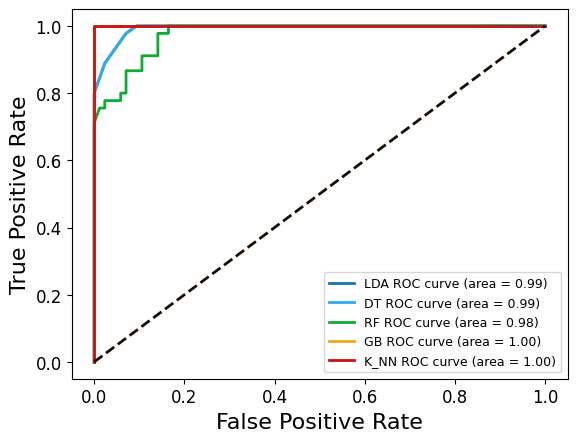

In [546]:
# Plot ROC curves Me quedo con esta opcion.
plt.plot(fpr_train_LDA, tpr_train_LDA, color='#1476AB', lw=2, label='LDA ROC curve (area = %0.2f)' % roc_auc_train_LDA)
plt.plot(fpr_train_tree, tpr_train_tree, color='#2DACEB', lw=2, label='DT ROC curve (area = %0.2f)' % roc_auc_train_tree)
plt.plot(fpr_train_rf, tpr_train_rf, color='#0BAD32', lw=2, label='RF ROC curve (area = %0.2f)' % roc_auc_train_rf)

# Plot GB ROC curve with adjusted x-axis limits
plt.plot(fpr_train_gb[fpr_train_gb <= 0.87], tpr_train_gb[fpr_train_gb <= 0.87], color='#F0A818', lw=2, label='GB ROC curve (area = %0.2f)' % roc_auc_train_gb)

plt.plot(fpr_train_knn, tpr_train_knn, color='#CC1013', lw=2, label='K_NN ROC curve (area = %0.2f)' % roc_auc_train_knn)  # Added KNeighbors ROC
plt.plot([0, 1.0], [0, 1.0], color='#170D03', lw=2, linestyle='--')  # Limit GB ROC curve up to 0.98

# Modify letters size of X and Y axes
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)

# Modify number size on X and Y axes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Set the limits of the x-axis and y-axis with a space before and after
plt.xlim([0 - 0.05, 1.05])  # Limit the x-axis up to 1.05
plt.gca().set_ylim([0 - 0.05, 1 + 0.05])

plt.legend(loc="lower right", fontsize=9)

# Save image with transparent background and resolution of 600 dpi
plt.savefig('roc_curve_train.png', dpi=600, transparent=True)
plt.show()

In [547]:
# Curva ROC prediction

In [548]:
probas_test_LDA = grid_search_tree.predict_proba(X_test_LDA)[:, 1]
probas_test_tree = grid_search_tree.predict_proba(X_test_tree)[:, 1]
probas_test_rf = grid_search_rf.predict_proba(X_test_rf)[:, 1]
probas_test_gb = grid_search_gb.predict_proba(X_test_gb)[:, 1]
probas_test_knn = grid_search_knn.predict_proba(X_test_knn)[:, 1]

In [549]:
# Compute ROC curve and AUC for decision tree model
fpr_test_LDA, tpr_test_LDA, thresholds_test_LDA = roc_curve(y_test_LDA, probas_test_LDA)
roc_auc_test_LDA = auc(fpr_test_LDA, tpr_test_LDA)

In [550]:
# Compute ROC curve and AUC for decision tree model
fpr_test_tree, tpr_test_tree, thresholds_test_tree = roc_curve(y_test_tree, probas_test_tree)
roc_auc_test_tree = auc(fpr_test_tree, tpr_test_tree)

In [551]:
# Compute ROC curve and AUC for ramdom forest
fpr_test_rf, tpr_test_rf, thresholds_test_rf = roc_curve(y_test_rf, probas_test_rf )
roc_auc_test_rf = auc(fpr_test_rf, tpr_test_rf)

In [552]:
# Compute ROC curve and AUC for Gradient Boosting
fpr_test_gb, tpr_test_gb, thresholds_test_gb= roc_curve(y_test_gb, probas_test_gb)
roc_auc_test_gb = auc(fpr_test_gb, tpr_test_gb)

In [553]:
# Compute ROC curve and AUC for Gradient Boosting
fpr_test_knn, tpr_test_knn, thresholds_test_knn= roc_curve(y_test_knn, probas_test_knn)
roc_auc_test_knn = auc(fpr_test_knn, tpr_test_knn)

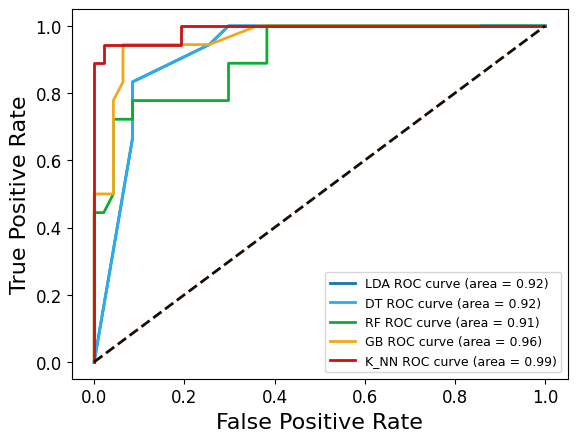

In [554]:
# Plot ROC curves Me quedo con esta opcion.
plt.plot(fpr_test_LDA, tpr_test_LDA, color='#1476AB', lw=2, label='LDA ROC curve (area = %0.2f)' % roc_auc_test_LDA)
plt.plot(fpr_test_tree, tpr_test_tree, color='#2DACEB', lw=2, label='DT ROC curve (area = %0.2f)' % roc_auc_test_tree)
plt.plot(fpr_test_rf, tpr_test_rf, color='#0BAD32', lw=2, label='RF ROC curve (area = %0.2f)' % roc_auc_test_rf)

# Plot GB ROC curve with adjusted x-axis limits
plt.plot(fpr_test_gb[fpr_test_gb <= 0.88], tpr_test_gb[fpr_test_gb <= 0.88], color='#F0A818', lw=2, label='GB ROC curve (area = %0.2f)' % roc_auc_test_gb)

plt.plot(fpr_test_knn, tpr_test_knn, color='#CC1013', lw=2, label='K_NN ROC curve (area = %0.2f)' % roc_auc_test_knn)  # Added KNeighbors ROC
plt.plot([0, 1.0], [0, 1.0], color='#170D03', lw=2, linestyle='--')  # Limit GB ROC curve up to 0.98

# Modify letters size of X and Y axes
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)

# Modify number size on X and Y axes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Set the limits of the x-axis and y-axis with a space before and after
plt.xlim([0 - 0.05, 1.05])  # Limit the x-axis up to 1.05
plt.gca().set_ylim([0 - 0.05, 1 + 0.05])

plt.legend(loc="lower right", fontsize=9)

# Save image with transparent background and resolution of 600 dpi
plt.savefig('roc_curve_val.png', dpi=600, transparent=True)
plt.show()

In [555]:

import pandas as pd

# Assuming the variables LDA_train_values, LDA_test_values, etc., are already defined as in your provided code.

data = {
    'Metric': ['Accuracy', 'Specificity', 'Sensitivity', '1-False Positive Rate'],
    'LDA train': LDA_train_values,
    'DT train': tree_train_values,
    'RF train': rf_train_values,
    'GB train': gb_train_values,
    'KNN train': knn_train_values,
    'LDA test': LDA_test_values,
    'DT test': tree_test_values,
    'RF test': rf_test_values,
    'GB test': gb_test_values,
    'KNN test': knn_test_values
}

df = pd.DataFrame(data)

# Función para aplicar estilos
def highlight_train_test(col):
    if col.name.endswith('train'):
        return ['background-color: #cce5ff'] * len(col)  # azul suave
    elif col.name.endswith('test'):
        return ['background-color: #d4edda'] * len(col)  # verde suave
    else:
        return [''] * len(col)

# Aplicar estilo
styled_df = df.style.apply(highlight_train_test, axis=0)

# Mostrar
styled_df

,Metric,LDA train,DT train,RF train,GB train,KNN train,LDA test,DT test,RF test,GB test,KNN test
0,Accuracy,0.876923,0.946154,0.892308,1.000000,1.000000,0.830769,0.800000,0.738462,0.923077,0.938462
1,Specificity,0.917647,0.929412,0.894118,1.000000,1.000000,0.829787,0.744681,0.702128,0.914894,0.936170
2,Sensitivity,0.800000,0.977778,0.888889,1.000000,1.000000,0.833333,0.944444,0.833333,0.944444,0.944444
3,1-False Positive Rate,0.917647,0.929412,0.894118,1.000000,1.000000,0.829787,0.744681,0.702128,0.914894,0.936170


In [556]:
cm_train_LDA

array([[78,  7],
       [ 9, 36]])

In [557]:
cm_train_tree

array([[79,  6],
       [ 1, 44]])

In [558]:
cm_train_rf

array([[76,  9],
       [ 5, 40]])

In [559]:
cm_train_gb

array([[85,  0],
       [ 0, 45]])

In [560]:
cm_train_knn

array([[85,  0],
       [ 0, 45]])

In [561]:
cm_pred_test_LDA

array([[39,  8],
       [ 3, 15]])

In [562]:
cm_pred_test_tree

array([[35, 12],
       [ 1, 17]])

In [563]:
cm_pred_test_rf

array([[33, 14],
       [ 3, 15]])

In [564]:
cm_pred_test_gb

array([[43,  4],
       [ 1, 17]])

In [565]:
cm_pred_test_knn

array([[44,  3],
       [ 1, 17]])

Prueba modelos no supervisados